# APPM 4600 Hw. 8
## Kevin Stull
### Problem 1


#### Lagrange

In [104]:
# Lagrange Interpolation (from in-class example)
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# function we are interpolating
def f(x):
  return 1 / (1 + x**2)

def eval_lagrange(xeval,xint,yint,N):
    lj = np.ones(N+1)
    for count in range(N+1):
       for jj in range(N+1):
           if (jj != count):
              lj[count] = lj[count]*(xeval - xint[jj])/(xint[count]-xint[jj])
    yeval = 0.
    for jj in range(N+1):
       yeval = yeval + yint[jj]*lj[jj]
    return(yeval)

''' create divided difference matrix'''
def dividedDiffTable(x, y, n):
    for i in range(1, n):
        for j in range(n - i):
            y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) /
                                     (x[j] - x[i + j]));
    return y

def evalDDpoly(xval, xint,y,N):
    ''' evaluate the polynomial terms'''
    ptmp = np.zeros(N+1)
    ptmp[0] = 1.
    for j in range(N):
      ptmp[j+1] = ptmp[j]*(xval-xint[j])
    '''evaluate the divided difference polynomial'''
    yeval = 0.
    for j in range(N+1):
       yeval = yeval + y[0][j]*ptmp[j]

    return yeval

def Lagrange(N, a, b, f, Neval, use_Cheb, scale):
  '''
  N : number of Nodes
  a, b : interval of interpolation
  f : function to use for interpolation
  Neval : number of interpolation points
  use_Cheb : if true will use Chebychev nodes
  scale : factor by which to scale chebychev nodes
  '''
  # function
  f = f
  N = N
  ''' interval'''
  a = a
  b = b

  ''' create equispaced interpolation nodes'''
  xint = np.linspace(a,b,N+1)

  ''' create interpolation data'''
  yint = f(xint)

  if use_Cheb:
    xint = scaled_chebychev(scale, N)
    yint = f(xint)

  ''' create points for evaluating the Lagrange interpolating polynomial'''
  Neval = Neval
  xeval = np.linspace(a,b,Neval+1)
  yeval_l= np.zeros(Neval+1)
  yeval_dd = np.zeros(Neval+1)

  '''Initialize and populate the first columns of the
    divided difference matrix. We will pass the x vector'''
  y = np.zeros( (N+1, N+1) )

  for j in range(N+1):
      y[j][0]  = yint[j]

  y = dividedDiffTable(xint, y, N+1)
  ''' evaluate lagrange poly '''
  for kk in range(Neval+1):
      yeval_l[kk] = eval_lagrange(xeval[kk],xint,yint,N)
      yeval_dd[kk] = evalDDpoly(xeval[kk],xint,y,N)

  ''' create vector with exact values'''
  fex = f(xeval)


  plt.figure()
  plt.plot(xeval,fex,'ro-', label='x_exact')
  plt.plot(xeval,yeval_l,'bs--', label='x_interp')
  plt.plot(xint, yint, marker='^', linestyle='', color='orange', label='nodes')
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title('Lagrange: for n=' + str(n) + '. Used Chebychev nodes: ' + str(use_Cheb))
  plt.legend()

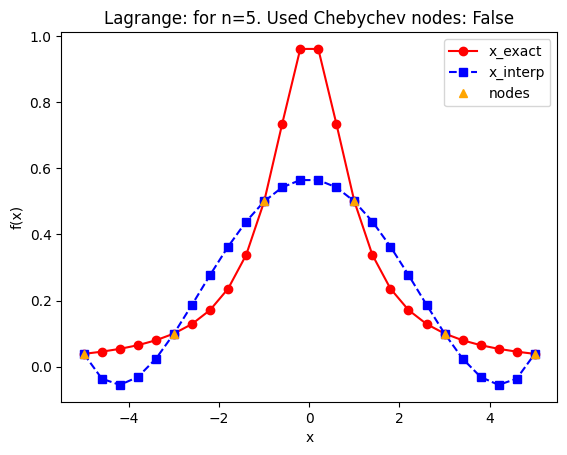

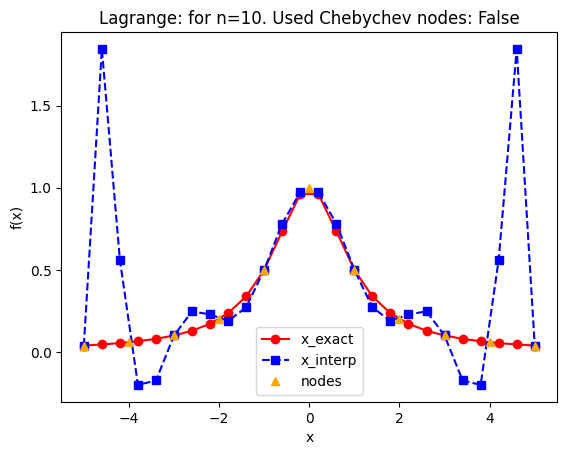

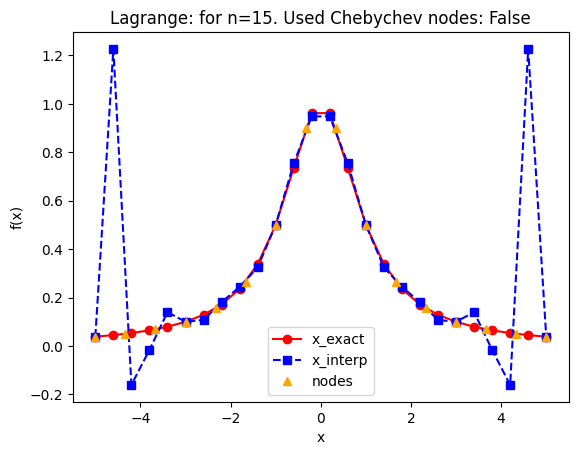

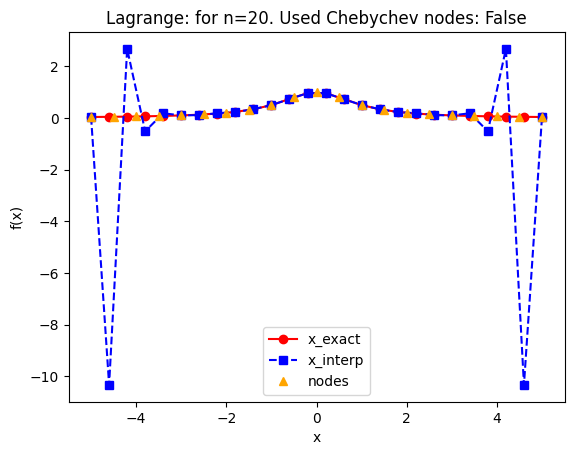

In [105]:
# Lagrange
n_list = range(5,25,5)
for n in n_list:
  Lagrange(n, -5, 5, f, 25, False, 5)

As we are used to Lagrange interpolation struggles at the endpoints.

#### Hermite interpolation.


In [106]:
# Hermite Interpolation (from in-class example)
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import math

# function we are interpolating
def f(x):
  return 1 / (1 + x**2)

def fp(x):
  return (-2*x)/(1+x**2)**2

# from class example
def Hermite(N, a, b, f, fp, Neval, use_Cheb, scale):
    '''
    N : number of Nodes
    a, b : interval of interpolation
    f : function to use for interpolation
    fp : derivative of f
    Neval : number of interpolation points
    use_Cheb : if true will use Chebychev nodes
    scale : factor by which to scale chebychev nodes
    '''

    # args
    f = fp
    fp = fp
    N = N
    a = a
    b = b

    ''' create equispaced interpolation nodes'''
    xint = np.linspace(a,b,N+1)

    ''' create interpolation data'''
    yint = np.zeros(N+1)
    ypint = np.zeros(N+1)

    if use_Cheb:
      xint = scaled_chebychev(scale, N)
      yint = f(xint)
      ypint = fp(xint)

    for jj in range(N+1):
        yint[jj] = f(xint[jj])
        ypint[jj] = fp(xint[jj])

    ''' create points for evaluating the Lagrange interpolating polynomial'''
    Neval = Neval
    xeval = np.linspace(a,b,Neval+1)
    yevalH = np.zeros(Neval+1)
    for kk in range(Neval+1):
      yevalH[kk] = eval_hermite(xeval[kk],xint,yint,ypint,N)

    ''' create vector with exact values'''
    fex = np.zeros(Neval+1)
    for kk in range(Neval+1):
        fex[kk] = f(xeval[kk])

    plt.figure()
    plt.plot(xeval,fex,'ro-', label='y_exact')
    plt.plot(xeval,yevalH,'c.--', label='Hermite')
    plt.plot(xint, yint, marker='^', linestyle='', color='orange', label='nodes')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.ylim(-1, 1)
    plt.title('Hermite: for n=' + str(n) + '. Used Chebychev nodes: ' + str(use_Cheb))
    plt.legend()
    plt.show()

def eval_hermite(xeval,xint,yint,ypint,N):

    ''' Evaluate all Lagrange polynomials'''

    lj = np.ones(N+1)
    for count in range(N+1):
       for jj in range(N+1):
           if (jj != count):
              lj[count] = lj[count]*(xeval - xint[jj])/(xint[count]-xint[jj])

    ''' Construct the l_j'(x_j)'''
    lpj = np.zeros(N+1)
    for count in range(N+1):
       for jj in range(N+1):
           if (jj != count):
              lpj[count] = lpj[count]+ 1./(xint[count] - xint[jj])

    yeval = 0.

    for jj in range(N+1):
       Qj = (1.-2.*(xeval-xint[jj])*lpj[jj])*lj[jj]**2
       Rj = (xeval-xint[jj])*lj[jj]**2
       yeval = yeval + yint[jj]*Qj+ypint[jj]*Rj

    return(yeval)



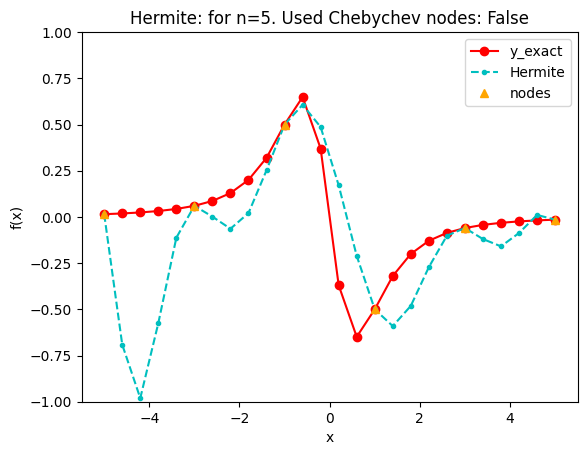

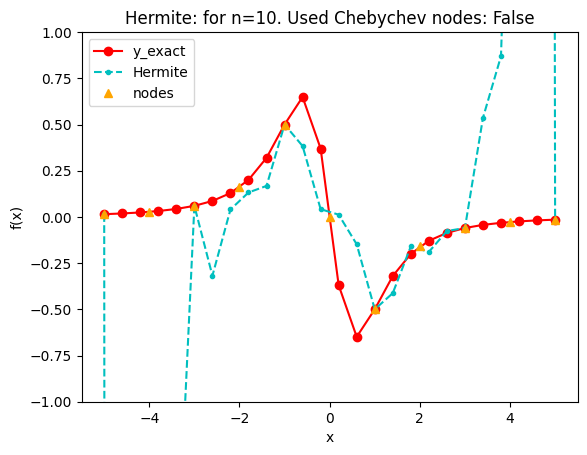

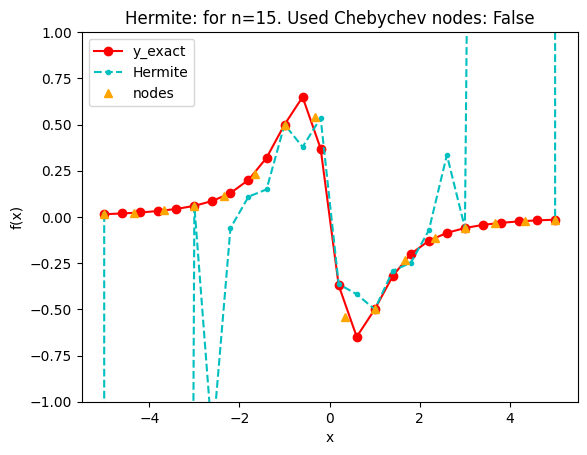

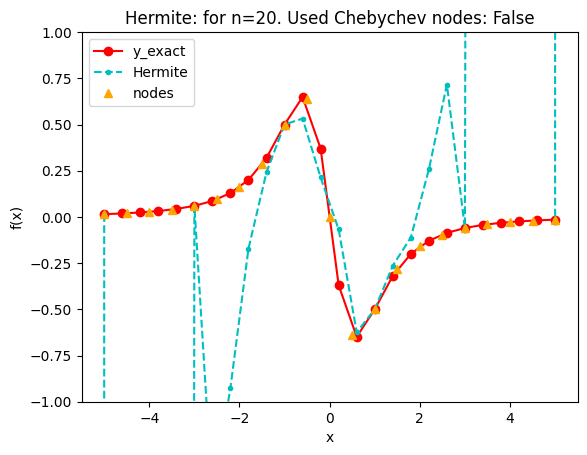

In [107]:
# Hermite
n_list = range(5,25,5)
for n in n_list:
  Hermite(n, -5, 5, f, fp, 25, False, 5)

This interpolation works pretty well for limited data but performs very badly at the endpoints, especially for larger N.

#### Natural Cubic spline


In [108]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.linalg import inv
from numpy.linalg import norm

# function we are interpolating
def f(x):
  return 1 / (1 + x**2)

# from class example
def Spline(N, a, b, f, Neval, use_Cheb, scale):
    '''
    N : number of Nodes
    a, b : interval of interpolation
    f : function to use for interpolation
    Neval : number of interpolation points
    use_Cheb : if true will use Chebychev nodes
    scale : factor by which to scale chebychev nodes
    '''

    # args
    f = f
    a = a
    b = b

    ''' number of intervals'''
    Nint = N
    xint = np.linspace(a,b,Nint+1)
    yint = f(xint)

    if use_Cheb:
      xint = scaled_chebychev(scale, N)
      yint = f(xint)

    ''' create points you want to evaluate at'''
    Neval = Neval
    xeval =  np.linspace(xint[0],xint[Nint],Neval+1)
    (M,C,D) = create_natural_spline(yint,xint,Nint)
    yeval = eval_cubic_spline(xeval,Neval,xint,Nint,M,C,D)

    ''' evaluate f at the evaluation points'''
    fex = f(xeval)

    plt.figure()
    plt.plot(xeval,fex,'ro-',label='exact function')
    plt.plot(xeval,yeval,'bs--',label='spline')
    plt.plot(xint, yint, marker='^', linestyle='', color='orange', label='nodes')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.ylim(-0.05, 1.5)
    plt.title('Spline: for n=' + str(n) + '. Used Chebychev nodes: ' + str(use_Cheb))
    plt.legend()
    plt.show()

def create_natural_spline(yint,xint,N):

#    create the right  hand side for the linear system
    b = np.zeros(N+1)
#  vector values
    h = np.zeros(N+1)
    for i in range(1,N):
       hi = xint[i]-xint[i-1]
       hip = xint[i+1] - xint[i]
       b[i] = (yint[i+1]-yint[i])/hip - (yint[i]-yint[i-1])/hi
       h[i-1] = hi
       h[i] = hip

#  create matrix so you can solve for the M values
# This is made by filling one row at a time
    A = np.zeros((N+1,N+1))
    A[0][0] = 1.0
    for j in range(1,N):
       A[j][j-1] = h[j-1]/6
       A[j][j] = (h[j]+h[j-1])/3
       A[j][j+1] = h[j]/6
    A[N][N] = 1

    Ainv = inv(A)

    M  = Ainv.dot(b)

#  Create the linear coefficients
    C = np.zeros(N)
    D = np.zeros(N)
    for j in range(N):
       C[j] = yint[j]/h[j]-h[j]*M[j]/6
       D[j] = yint[j+1]/h[j]-h[j]*M[j+1]/6
    return(M,C,D)

def eval_local_spline(xeval,xi,xip,Mi,Mip,C,D):
# Evaluates the local spline as defined in class

    hi = xip-xi
    yeval = (Mi*(xip-xeval)**3 +(xeval-xi)**3*Mip)/(6*hi) \
            + C*(xip-xeval) + D*(xeval-xi)
    return yeval


def  eval_cubic_spline(xeval,Neval,xint,Nint,M,C,D):

    yeval = np.zeros(Neval+1)

    for j in range(Nint):
        '''find indices of xeval in interval (xint(jint),xint(jint+1))'''
        '''let ind denote the indices in the intervals'''
        atmp = xint[j]
        btmp= xint[j+1]

#   find indices of values of xeval in the interval
        ind= np.where((xeval >= atmp) & (xeval <= btmp))
        xloc = xeval[ind]

# evaluate the spline
        yloc = eval_local_spline(xloc,atmp,btmp,M[j],M[j+1],C[j],D[j])

#   copy into yeval
        yeval[ind] = yloc
    return(yeval)



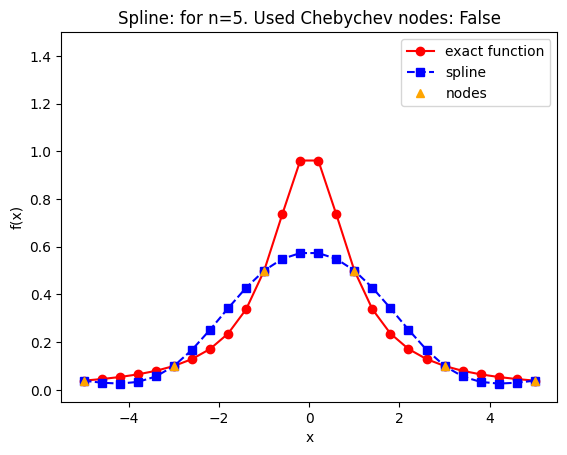

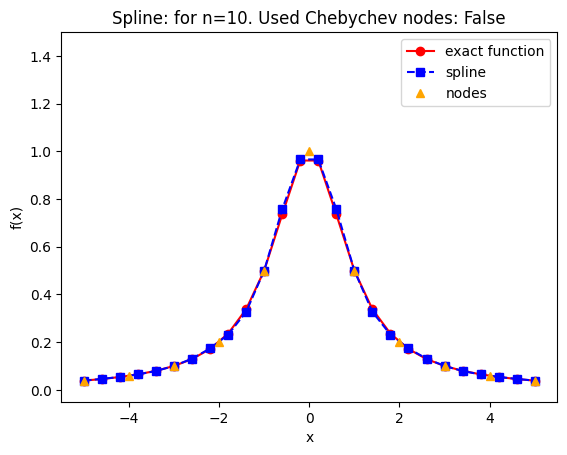

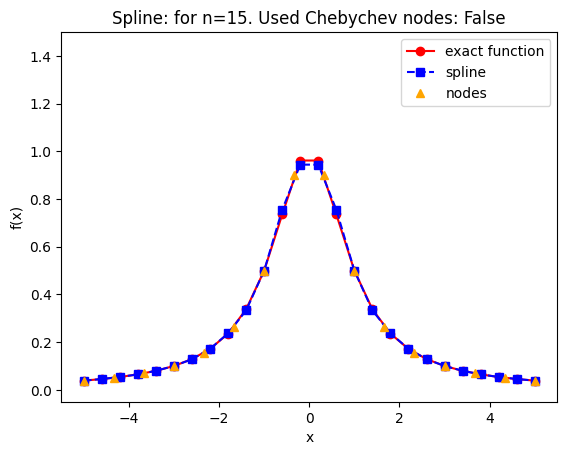

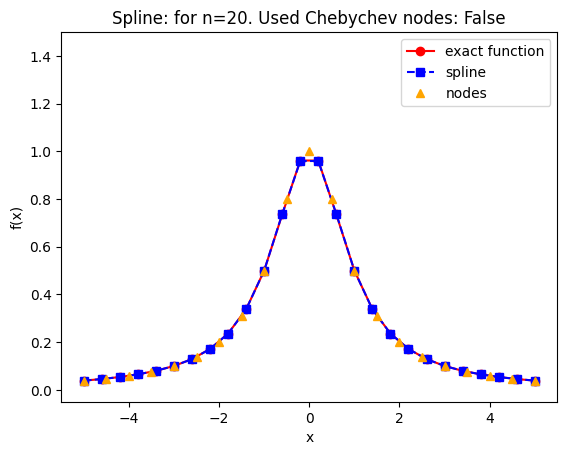

In [109]:
# Spline
n_list = range(5,25,5)
for n in n_list:
  Spline(n, -5, 5, f, 25, False, 5)


Here we can see that spline method works the best by far. Once a node was provided near x=0, for N=10, it was able to match the function almost exactly.

#### Explanation for 1
We can see that if the endpoints are not dealt with carefully, the spline method will work the best. This is because it is fitting linear coefficients and not a polynomial that must go through the points and be continuous everywhere. I suspect the results will be different when using Chebychev nodes.


### Problem 2

So we don't have to modify our code too much, we'll define a special function to convert our normal nodes into Chevychev nodes then add a boolean argument to dictate if our interpolation functions should use them.

In [116]:
# assumes an interval centered on 0
def scaled_chebychev(scale, N):
  e_nodes = list(range(1,N+2))
  c_nodes = []
  for k in e_nodes:
    c_nodes.append(scale*(np.cos(np.pi*(2*k - 1)/(N*2))))
  return np.array(c_nodes)


<ipython-input-104-9069c05e5e8d>:25: RuntimeWarning: invalid value encountered in double_scalars
  y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) /
<ipython-input-104-9069c05e5e8d>:15: RuntimeWarning: divide by zero encountered in double_scalars
  lj[count] = lj[count]*(xeval - xint[jj])/(xint[count]-xint[jj])


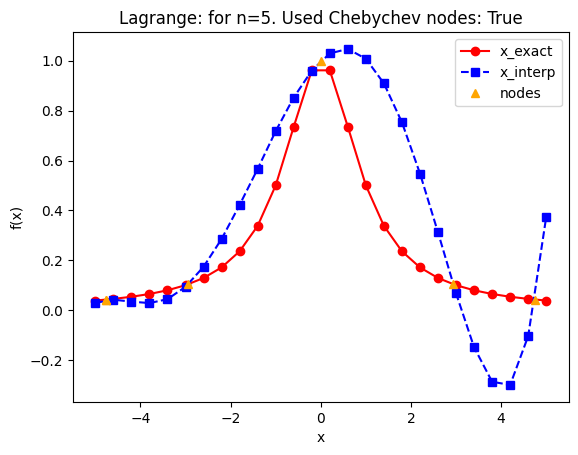

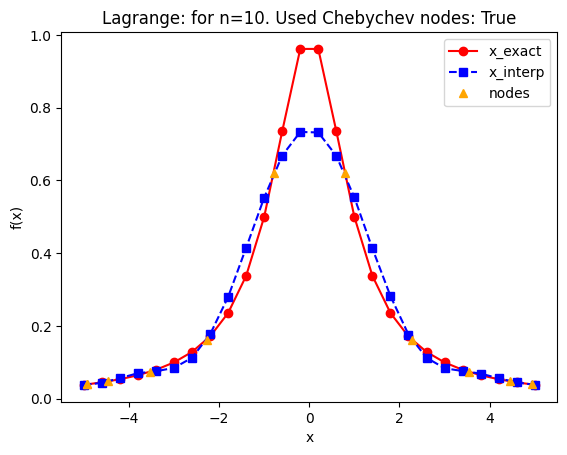

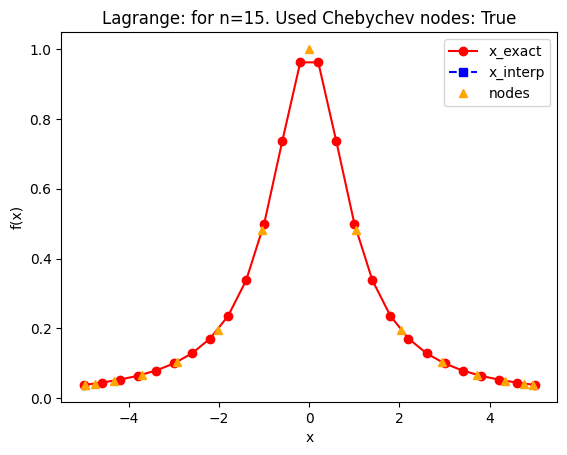

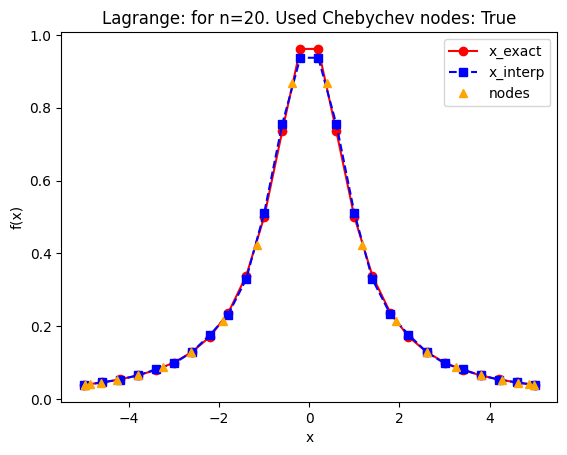

In [111]:
# Lagrange
n_list = range(5,25,5)
for n in n_list:
  Lagrange(n, -5, 5, f, 25, True, 5)


I am not sure what is going on with n = 15 but clearly the results look much better!

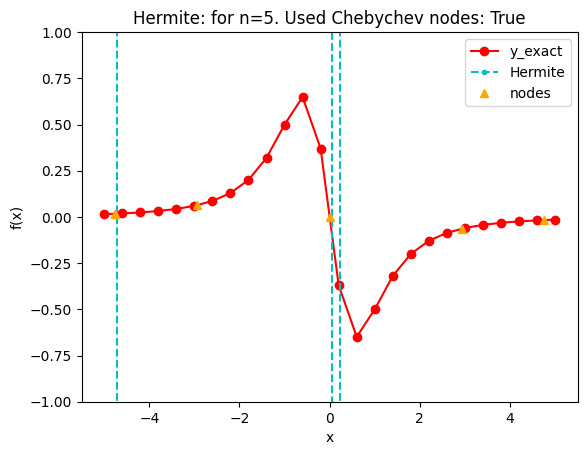

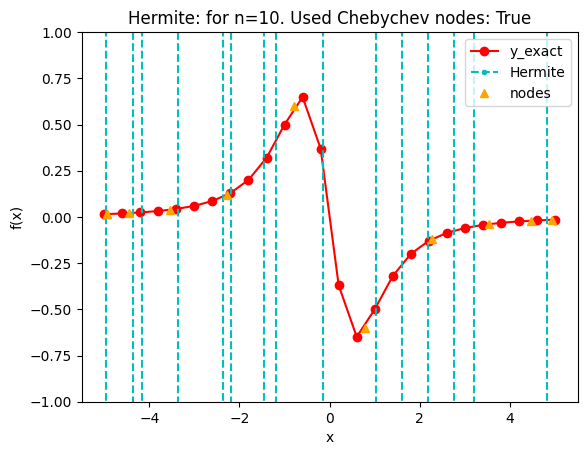

<ipython-input-106-820848e3569b>:80: RuntimeWarning: divide by zero encountered in double_scalars
  lj[count] = lj[count]*(xeval - xint[jj])/(xint[count]-xint[jj])
<ipython-input-106-820848e3569b>:87: RuntimeWarning: divide by zero encountered in double_scalars
  lpj[count] = lpj[count]+ 1./(xint[count] - xint[jj])
<ipython-input-106-820848e3569b>:94: RuntimeWarning: invalid value encountered in double_scalars
  yeval = yeval + yint[jj]*Qj+ypint[jj]*Rj


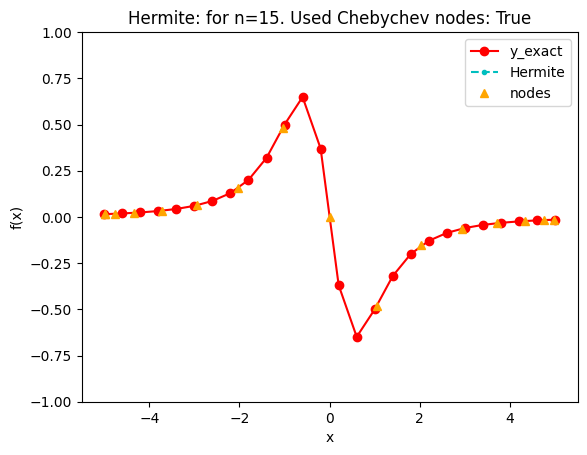

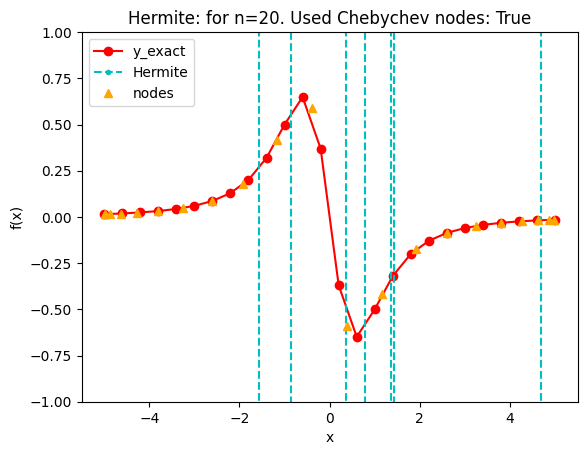

In [117]:
# Hermite
n_list = range(5,25,5)
for n in n_list:
  Hermite(n, -5, 5, f, fp, 25, True, 5)

It seems that since this method was already unstable at the endpoints, it was just futher destabilized by the Chebychev nodes, which are more dense at the endpoints.

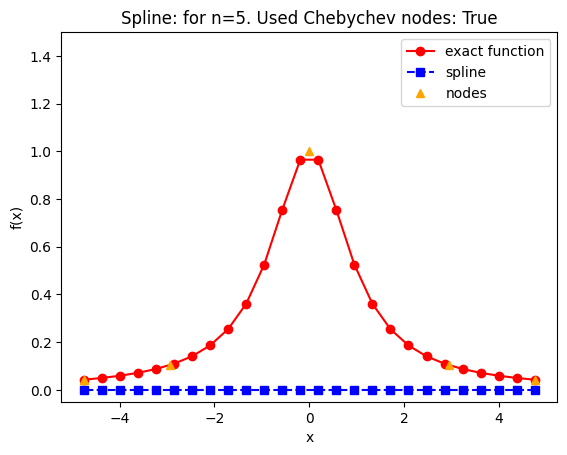

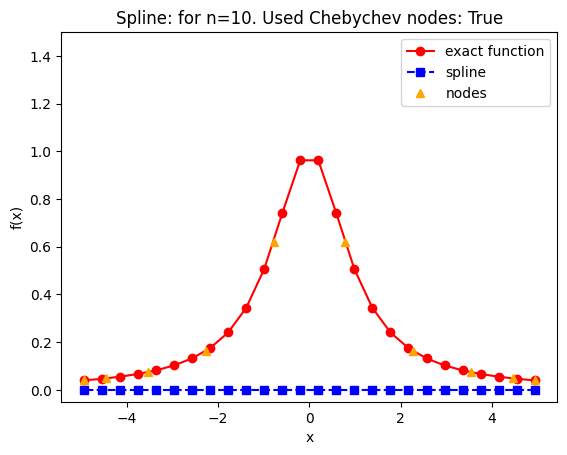

<ipython-input-108-a0b2e69057a0>:65: RuntimeWarning: invalid value encountered in double_scalars
  b[i] = (yint[i+1]-yint[i])/hip - (yint[i]-yint[i-1])/hi
<ipython-input-108-a0b2e69057a0>:87: RuntimeWarning: divide by zero encountered in double_scalars
  C[j] = yint[j]/h[j]-h[j]*M[j]/6
<ipython-input-108-a0b2e69057a0>:88: RuntimeWarning: divide by zero encountered in double_scalars
  D[j] = yint[j+1]/h[j]-h[j]*M[j+1]/6


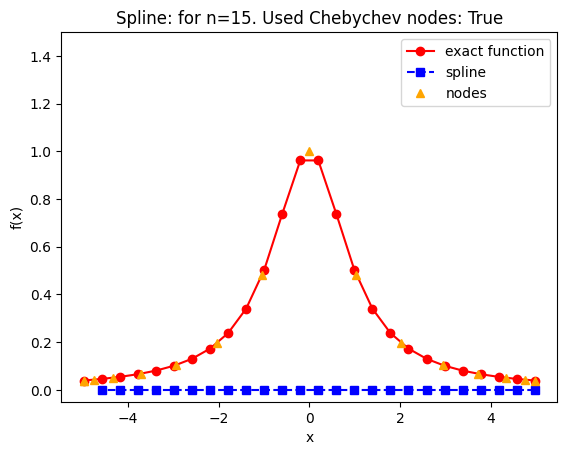

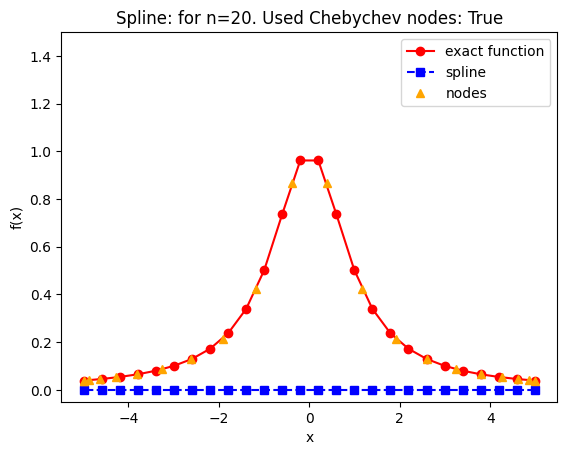

In [118]:
# Spline
n_list = range(5,25,5)
for n in n_list:
  Spline(n, -5, 5, f, 25, True, 5)


Adding the Chebychev nodes seems to cause some instability with the splines as well. Which I find strange.

#### Summary of 2
While Lagrange interpolation clearly benifitted from the Chebychev nodes it seemes to negatively impact the spline and Hermite methods.

### Problem 3
In order to modify it, you must use the natural periodic spline conditions. That is, f(0) = f(2π) and f'(0) = f'(2π)